In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from math import sqrt

In [3]:
import os
os.getcwd()

'/Users/clause/Desktop/Stuff/DM'

In [4]:
df = pd.read_csv('/Users/clause/documents/GitHub/bank_data_analysis/bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<AxesSubplot:xlabel='y', ylabel='count'>

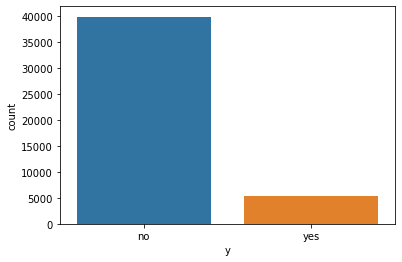

In [5]:
sns.countplot(x = 'y', data = df)

In [6]:
labelencoder_X = LabelEncoder()

df["job"] = labelencoder_X.fit_transform(df["job"])
df["marital"] = labelencoder_X.fit_transform(df["marital"])
df["education"] = labelencoder_X.fit_transform(df["education"])
df["default"] = labelencoder_X.fit_transform(df["default"])
df["housing"] = labelencoder_X.fit_transform(df["housing"])
df["loan"] = labelencoder_X.fit_transform(df["loan"])
df["contact"] = labelencoder_X.fit_transform(df["contact"])
df["month"] = labelencoder_X.fit_transform(df["month"])
df["day"] = labelencoder_X.fit_transform(df["day"])
df["poutcome"] = labelencoder_X.fit_transform(df["poutcome"])

In [7]:
df['y'] = df['y'].astype('category')

encode_map = {'no': 0,
              'yes': 1}

df['y'].replace(encode_map, inplace = True)

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

#y = df["y"].map({"no":0, "yes":1})
#X = df.drop("y", axis=1)

In [8]:
X.drop("duration", inplace=True, axis=1)
X.drop("contact", inplace=True, axis=1)

In [9]:
X = X.fillna(0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [11]:
X_train

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,poutcome
42969,47,0,1,1,0,0,0,1,9,3,2,93,2,1
23060,35,4,1,2,0,0,0,0,25,1,2,-1,0,3
18828,36,4,1,2,0,3007,1,0,3,1,1,-1,0,3
13554,42,1,1,1,0,-422,0,0,8,5,1,-1,0,3
16646,48,7,1,1,0,0,0,0,23,5,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33464,45,10,0,0,0,757,0,0,19,0,1,325,4,0
6942,35,0,2,1,0,3,1,0,27,8,5,-1,0,3
20436,46,2,1,1,0,-880,0,1,11,1,2,-1,0,3
10124,45,4,1,2,0,409,0,0,10,6,1,-1,0,3


In [13]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(sampling_strategy='auto', k_neighbors=5, n_jobs=-1)
X_train, y_train = oversampler.fit_resample(X_train,y_train)

In [14]:
X_train

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,poutcome
0,47,0,1,1,0,0,0,1,9,3,2,93,2,1
1,35,4,1,2,0,0,0,0,25,1,2,-1,0,3
2,36,4,1,2,0,3007,1,0,3,1,1,-1,0,3
3,42,1,1,1,0,-422,0,0,8,5,1,-1,0,3
4,48,7,1,1,0,0,0,0,23,5,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71823,60,1,1,0,0,5,0,0,15,2,1,93,2,2
71824,50,1,1,0,0,-520,1,0,10,7,5,-1,0,3
71825,48,4,0,1,0,755,0,0,30,5,4,-1,0,3
71826,42,2,1,1,0,662,0,0,23,5,1,-1,0,3


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [17]:
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    
    def __len__(self):
        return len(self.X_data)
    
train_data = trainData(torch.FloatTensor(X_train),
                       torch.FloatTensor(y_train))

class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
    
    def __len__(self):
        return len(self.X_data)
       
test_data = testData(torch.FloatTensor(X_test))

In [18]:
train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = 1)

In [19]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.layer_1 = nn.Linear(14, 64)
        self.layer_2 = nn.Linear(64, 64)
        self.layer_3 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p = 0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


In [21]:
model = MLP()
model.to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE)

print(model)

MLP(
  (layer_1): Linear(in_features=14, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [22]:
def MLP_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [23]:
def MLP_mcc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    cm = confusion_matrix(y_test.detach().numpy(), y_pred_tag.detach().numpy())
    mcc = (cm[0,0]*cm[1,1]-cm[0,1]*cm[1,0])/sqrt((cm[0,0]+cm[0,1])*(cm[0,0]+cm[1,0])*(cm[1,1]+cm[0,1])*(cm[1,1]+cm[1,0]))
    
    return mcc

In [24]:
model.train()
for e in range(1, EPOCHS + 1):
    epoch_loss = 0
    epoch_acc = 0
    epoch_mcc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = MLP_acc(y_pred, y_batch.unsqueeze(1))
        mcc = MLP_mcc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        epoch_mcc += mcc.item()
        
    #print(f'Epoch {e+0:03}: | Loss:{epoch_loss/len(train_loader):.5f} | Acc:{epoch_acc/len(train_loader): .3f}')
    print(f'Epoch {e+0:03}: | Loss:{epoch_loss/len(train_loader):.5f} | Acc:{epoch_acc/len(train_loader): .3f} Mcc:{epoch_mcc/len(train_loader): .3f}')

Epoch 001: | Loss:0.50428 | Acc: 76.020 Mcc: 0.524
Epoch 002: | Loss:0.48381 | Acc: 77.146 Mcc: 0.546
Epoch 003: | Loss:0.47433 | Acc: 78.040 Mcc: 0.564
Epoch 004: | Loss:0.46562 | Acc: 78.542 Mcc: 0.575
Epoch 005: | Loss:0.45577 | Acc: 79.006 Mcc: 0.584
Epoch 006: | Loss:0.44213 | Acc: 79.969 Mcc: 0.603
Epoch 007: | Loss:0.43017 | Acc: 80.693 Mcc: 0.617
Epoch 008: | Loss:0.42370 | Acc: 81.086 Mcc: 0.625
Epoch 009: | Loss:0.41920 | Acc: 81.271 Mcc: 0.629
Epoch 010: | Loss:0.41324 | Acc: 81.703 Mcc: 0.637
Epoch 011: | Loss:0.40957 | Acc: 81.801 Mcc: 0.640
Epoch 012: | Loss:0.40766 | Acc: 81.955 Mcc: 0.642
Epoch 013: | Loss:0.40455 | Acc: 82.118 Mcc: 0.645
Epoch 014: | Loss:0.40165 | Acc: 82.246 Mcc: 0.649
Epoch 015: | Loss:0.39878 | Acc: 82.461 Mcc: 0.652
Epoch 016: | Loss:0.39600 | Acc: 82.614 Mcc: 0.655
Epoch 017: | Loss:0.39401 | Acc: 82.767 Mcc: 0.658
Epoch 018: | Loss:0.39215 | Acc: 82.920 Mcc: 0.661
Epoch 019: | Loss:0.39125 | Acc: 82.901 Mcc: 0.661
Epoch 020: | Loss:0.38916 | Acc

In [25]:
def pred(x, test_loader):
    y_pred_list = []
    model.eval()
    with torch.no_grad():
        for X_batch in test_loader:
            X_batch = X_batch.to(device)
            y_test_pred= model(X_batch)
            y_test_pred= torch.sigmoid(y_test_pred)
            y_pred_tag = torch.round(y_test_pred)
            y_pred_list.append(y_pred_tag.cpu().numpy())
        
    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
    cm = confusion_matrix(x, y_pred_list)
    acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    mcc = (cm[0,0]*cm[1,1]-cm[0,1]*cm[1,0])/sqrt((cm[0,0]+cm[0,1])*(cm[0,0]+cm[1,0])*(cm[1,1]+cm[0,1])*(cm[1,1]+cm[1,0]))
    
    print('Confusion Matrix:')
    print(cm)
    print(f' Accurency:{acc}, MCC:{mcc}')

In [26]:
pred(y_test, test_loader)

Confusion Matrix:
[[3476  532]
 [ 268  246]]
 Accurency:0.8230871295886776, MCC:0.2908666471405811
